**Risk management - price volatility prediction**

Here, we combine statistical modelling and Machine Learning (Stationarity &  fbprophet package) to predict retail price volatility

In [0]:
#getting and cleaning data 

In [0]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
url_maizeprice ='http://www.foodsecurityportal.org/api/countries/maize.csv'
maize = pd.read_csv(url_maizeprice)
maize.head(20)

,Country,Nov 12,Dec 12,Jan 13,Feb 13,Mar 13,Apr 13,May 13,Jun 13,Jul 13,Aug 13,Sep 13,Oct 13,Nov 13,Dec 13,Jan 14,Feb 14,Mar 14,Apr 14,May 14,Jun 14,Jul 14,Aug 14,Sep 14,Oct 14,Nov 14,Dec 14,Jan 15,Feb 15,Mar 15,Apr 15,May 15,Jun 15,Jul 15,Aug 15,Sep 15,Oct 15,Nov 15,Dec 15,Jan 16,...,Apr 16,May 16,Jun 16,Jul 16,Aug 16,Sep 16,Oct 16,Nov 16,Dec 16,Jan 17,Feb 17,Mar 17,Apr 17,May 17,Jun 17,Jul 17,Aug 17,Sep 17,Oct 17,Nov 17,Dec 17,Jan 18,Feb 18,Mar 18,Apr 18,May 18,Jun 18,Jul 18,Aug 18,Sep 18,Oct 18,Nov 18,Dec 18,Jan 19,Feb 19,Mar 19,Apr 19,May 19,Jun 19,Jul 19
0,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bahamas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Barbados,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Brazil,0.22,0.22,0.22,0.23,0.22,0.20,0.18,0.16,0.15,0.14,0.15,0.15,0.15,0.15,0.15,0.15,0.17,0.18,0.17,0.16,0.15,0.14,0.14,0.13,0.14,0.14,0.14,0.13,0.12,0.12,0.11,0.11,0.11,0.10,0.09,0.11,0.11,0.11,0.12,...,0.18,0.20,0.19,0.21,0.21,0.20,0.20,0.18,0.16,0.16,0.15,0.13,0.12,0.12,0.11,0.11,0.11,0.12,0.13,0.13,0.13,0.13,0.13,0.13,0.16,0.15,0.15,0.14,0.14,0.14,0.15,0.14,0.13,0.14,0.14,0.14,0.13,0.12,0.13,0.14
6,Cambodia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Chad,0.59,0.62,0.49,0.45,0.42,0.46,0.47,0.50,0.57,0.58,0.58,0.51,NaN,0.50,0.54,0.54,0.56,0.56,0.55,0.50,0.54,0.57,0.56,0.55,0.51,0.50,0.45,0.42,NaN,NaN,0.41,0.41,0.45,0.46,NaN,0.44,0.44,NaN,0.43,...,NaN,NaN,NaN,NaN,0.41,0.41,0.40,NaN,0.39,NaN,0.37,NaN,0.39,NaN,0.43,0.40,NaN,NaN,NaN,0.43,0.46,NaN,NaN,NaN,0.47,NaN,0.46,0.46,NaN,0.44,0.44,0.41,NaN,NaN,0.42,0.34,NaN,0.34,0.34,NaN
8,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.75,0.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Colombia,0.48,0.46,0.46,0.45,0.45,0.44,0.45,0.44,0.41,0.41,0.41,0.44,0.43,0.42,0.41,0.36,0.37,0.39,0.42,0.42,0.44,0.41,0.38,0.38,0.38,0.36,0.35,0.35,0.32,NaN,0.36,0.35,0.33,0.33,0.33,0.38,0.39,0.34,0.30,...,0.33,0.34,0.53,0.55,0.36,0.32,0.32,0.30,0.33,0.33,0.29,0.27,0.30,0.30,0.31,0.34,0.33,0.34,0.35,0.35,0.34,0.33,

In [0]:
WestAfrica = maize.iloc[[26, 31, 32, 39],:]
#WestAfrica
WestAfrica.set_index('Country')
WA = WestAfrica.transpose()
WA.columns= ['Liberia','Niger', 'Nigeria', 'Sierra Leone']
WA.drop('Country', inplace=True)
WA.reindex()
#WA
WA_dt = WA.reset_index()
WA_dt.columns= ['Date','Liberia','Niger', 'Price', 'Sierra Leone']
#WA_dt
Nigeria_dt = WA_dt.drop(['Liberia', 'Niger','Sierra Leone'], axis = 'columns')
Nigeria_dt.fillna(0.32, inplace=True)
#Nigeria_dt

In [0]:
Nigeria_dt.Date = pd.to_datetime(Nigeria_dt.Date, errors='coerce')

In [7]:
ser = pd.Series(pd.date_range('2012-10', periods=82, freq='M' ))
ser.to_numpy(dtype=object)
ser.to_numpy(dtype="datetime64[ns]")

array(['2012-10-31T00:00:00.000000000', '2012-11-30T00:00:00.000000000',
       '2012-12-31T00:00:00.000000000', '2013-01-31T00:00:00.000000000',
       '2013-02-28T00:00:00.000000000', '2013-03-31T00:00:00.000000000',
       '2013-04-30T00:00:00.000000000', '2013-05-31T00:00:00.000000000',
       '2013-06-30T00:00:00.000000000', '2013-07-31T00:00:00.000000000',
       '2013-08-31T00:00:00.000000000', '2013-09-30T00:00:00.000000000',
       '2013-10-31T00:00:00.000000000', '2013-11-30T00:00:00.000000000',
       '2013-12-31T00:00:00.000000000', '2014-01-31T00:00:00.000000000',
       '2014-02-28T00:00:00.000000000', '2014-03-31T00:00:00.000000000',
       '2014-04-30T00:00:00.000000000', '2014-05-31T00:00:00.000000000',
       '2014-06-30T00:00:00.000000000', '2014-07-31T00:00:00.000000000',
       '2014-08-31T00:00:00.000000000', '2014-09-30T00:00:00.000000000',
       '2014-10-31T00:00:00.000000000', '2014-11-30T00:00:00.000000000',
       '2014-12-31T00:00:00.000000000', '2015-01-31

In [8]:
Nigeria_dt['col4'] = Nigeria_dt['Price'].map(ser)
#print (Nigeria_dt)
Nigeria_dt['col4'] = ser
#Nigeria_dt
Nig_dt = Nigeria_dt.drop('Date', axis='columns')
Nig_dt = Nig_dt.rename(columns={'col4' : 'dt'})
#Nig_dt
Nig_dts = Nig_dt.set_index('dt')
Nig_dts

,Price
dt,
2012-10-31,0.36
2012-11-30,0.40
2012-12-31,0.42
2013-01-31,0.41
2013-02-28,0.45
...,...
2019-02-28,0.29
2019-03-31,0.32
2019-04-30,0.29


In [0]:
#Plotting time serie
import matplotlib.pyplot as plt
%matplotlib inline
#from IPython.display import display, HTML, display_html
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


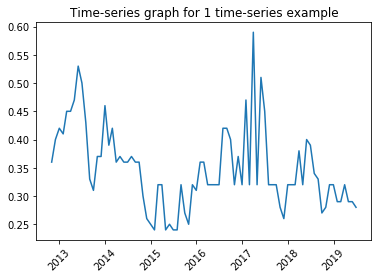

In [10]:
f, ax = plt.subplots(1,1)
ax.plot(Nig_dts['Price'])

# Add title
ax.set_title('Time-series graph for 1 time-series example')

# Rotate x-labels
ax.tick_params(axis = 'x', rotation = 45)

# Show graph
plt.show()
plt.close()

**Analysing stationarity**

In [0]:
#Analysing Stationarity
from statsmodels.tsa.stattools import adfuller

In [0]:
def test_stationarity(df, ts):  
    """
    Test stationarity using moving average statistics and Dickey-Fuller test

    """
    # Estimating rolling statistics
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    # Plotting rolling estimate
    orig = plt.plot(df[ts], 
                   color = 'blue', 
                   label = 'Original')
    mean = plt.plot(rolmean, 
                   color = 'red', 
                   label = 'Rolling Mean')
    orig = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Dickey-Fuller test
    # Ho: time series is not stationary
    # H1: time series is stationary
   
    print('Results of Dickey-Fuller Test:') 
    dftest = adfuller(df[ts], 
                     autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], 
                        index = ['Test Statistic', 
                                'p-value', 
                                '# Lags Used', 
                                'Number of Observation Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

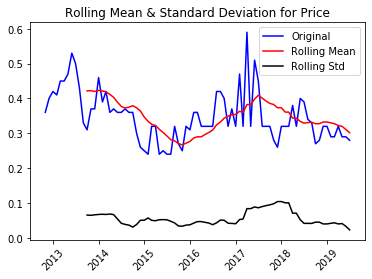

Results of Dickey-Fuller Test:
Test Statistic                -2.526104
p-value                        0.109251
# Lags Used                    1.000000
Number of Observation Used    79.000000
Critical Value (1%)           -3.515977
Critical Value (5%)           -2.898886
Critical Value (10%)          -2.586694
dtype: float64


In [13]:
test_stationarity(df = Nig_dts, ts = 'Price')

For p=0.05 < phat, the null hypothesis Ho is accepted: data do not present stationarity

In [0]:
# At p=0.05 < p-value = 0.10  ---> data is not stationary = Ho

**Correcting stationarity by transforming data**

In [0]:
# Correcting stationarity by transforming data

In [0]:
def plot_transformed_data(df, ts, ts_transform): 
    """
    Plot transformed and original time series data
    """
    # Plot time series data
    f, ax = plt.subplots(1,1)
    ax.plot(df[ts])
    ax.plot(df[ts_transform], color = 'red')
    
    # Add title
    ax.set_title('%s and %s time-series graph' %(ts, ts_transform))
    
    # Rotate x-labels
    ax.tick_params(axis = 'x', rotation = 45)
    
    # Add Legend
    ax.legend([ts, ts_transform])
    
    plt.show()
    plt.close()
    
    return

In [15]:
# Transformation - log ts
Nig_dts['ts_log'] = Nig_dts['Price'].apply(lambda x: np.log(x))

# Transformation - 7 days moving averages of log ts
Nig_dts['ts_log_moving_avg'] = Nig_dts['ts_log'].rolling(window = 7, center = False).mean()

# Transformation - 7 days moving averages of ts
Nig_dts['ts_moving_avg'] = Nig_dts['Price'].rolling(window = 7, center = False).mean()

# Transformation - Difference between logged ts and first-order differencee logged ts
Nig_dts['ts_log_diff'] = Nig_dts['ts_log'].diff()

# Transformation - Difference between ts and moving average ts
Nig_dts['ts_moving_avg_diff'] = Nig_dts['Price'] - Nig_dts['ts_moving_avg']

# Transformation - Difference between logged ts and logged moving average ts
Nig_dts['ts_log_moving_avg_diff'] = Nig_dts['ts_log'] - Nig_dts['ts_log_moving_avg'] 

# Transformation - Difference between logged ts and logged moving average ts
Nig_dts_transform = Nig_dts.dropna()

# Transformation - logged exponentially weighted moving averages (EWMA) ts 
Nig_dts_transform['ts_log_ewma'] = Nig_dts_transform['ts_log'].ewm(halflife = 7, ignore_na = False, min_periods = 0, adjust = True).mean()

# Transformation - Difference between logged ts and logged EWMA ts
Nig_dts_transform['ts_log_ewma_diff'] = Nig_dts_transform['ts_log']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
# Display data before and after transformation
display(Nig_dts.head())

,Price,ts_log,ts_log_moving_avg,ts_moving_avg,ts_log_diff,ts_moving_avg_diff,ts_log_moving_avg_diff
dt,,,,,,,
2012-10-31,0.36,-1.021651,NaN,NaN,NaN,NaN,NaN
2012-11-30,0.40,-0.916291,NaN,NaN,0.105361,NaN,NaN
2012-12-31,0.42,-0.867501,NaN,NaN,0.048790,NaN,NaN
2013-01-31,0.41,-0.891598,NaN,NaN,-0.024098,NaN,NaN
2013-02-28,0.45,-0.798508,NaN,NaN,0.093090,NaN,NaN


In [17]:
display(Nig_dts_transform.head())

,Price,ts_log,ts_log_moving_avg,ts_moving_avg,ts_log_diff,ts_moving_avg_diff,ts_log_moving_avg_diff,ts_log_ewma,ts_log_ewma_diff
dt,,,,,,,,,
2013-04-30,0.47,-0.755023,-0.864154,0.422857,0.043485,0.047143,0.109132,-0.755023,-0.755023
2013-05-31,0.53,-0.634878,-0.808901,0.447143,0.120144,0.082857,0.174023,-0.691979,-0.634878
2013-06-30,0.50,-0.693147,-0.777023,0.461429,-0.058269,0.038571,0.083876,-0.692407,-0.693147
2013-07-31,0.43,-0.843970,-0.773662,0.462857,-0.150823,-0.032857,-0.070308,-0.736097,-0.843970
2013-08-31,0.33,-1.108663,-0.804671,0.451429,-0.264693,-0.121429,-0.303992,-0.826045,-1.108663


In [0]:
#Nig_dts_transform.index

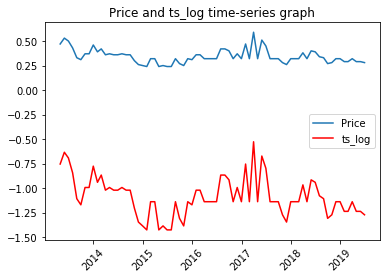

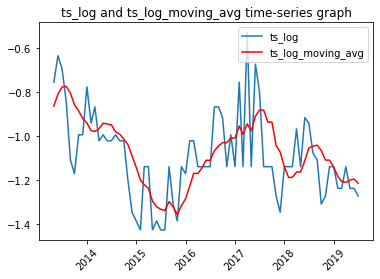

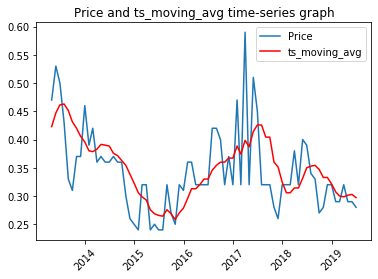

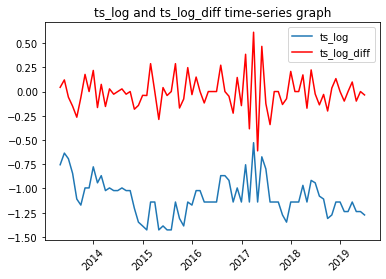

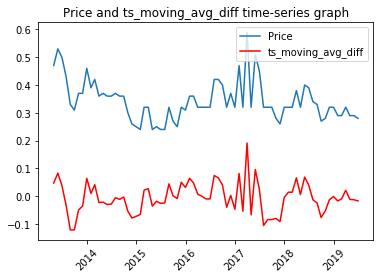

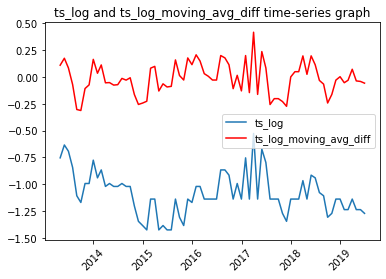

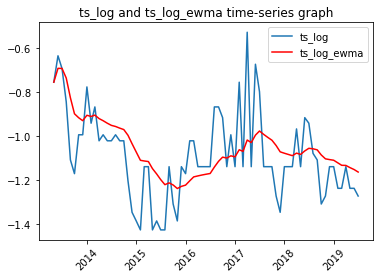

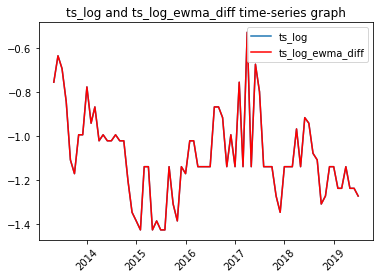

In [18]:
# Plotting transformed data

# Plot data
plot_transformed_data(df = Nig_dts_transform, 
                      ts = 'Price', 
                      ts_transform = 'ts_log')
# Plot data
plot_transformed_data(df = Nig_dts_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_moving_avg')

# Plot data
plot_transformed_data(df = Nig_dts_transform, 
                      ts = 'Price', 
                      ts_transform = 'ts_moving_avg')

# Plot data
plot_transformed_data(df = Nig_dts_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_diff')

# Plot data
plot_transformed_data(df = Nig_dts_transform, 
                      ts = 'Price', 
                      ts_transform = 'ts_moving_avg_diff')

# Plot data
plot_transformed_data(df = Nig_dts_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_moving_avg_diff')

# Plot data
plot_transformed_data(df = Nig_dts_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_ewma')
# Plot data
plot_transformed_data(df = Nig_dts_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_ewma_diff')

**Performing Stationarity tests**

In [0]:
## Performing Stationarity tests

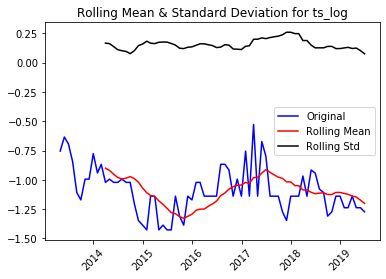

Results of Dickey-Fuller Test:
Test Statistic                -3.234401
p-value                        0.018078
# Lags Used                    1.000000
Number of Observation Used    73.000000
Critical Value (1%)           -3.523284
Critical Value (5%)           -2.902031
Critical Value (10%)          -2.588371
dtype: float64


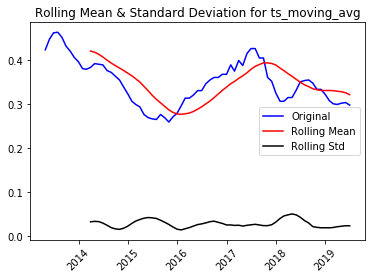

Results of Dickey-Fuller Test:
Test Statistic                -2.459939
p-value                        0.125528
# Lags Used                    9.000000
Number of Observation Used    65.000000
Critical Value (1%)           -3.535217
Critical Value (5%)           -2.907154
Critical Value (10%)          -2.591103
dtype: float64


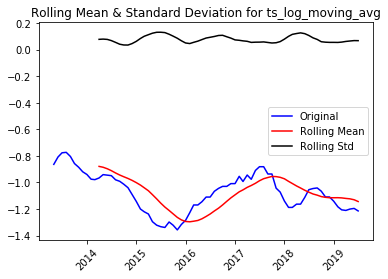

Results of Dickey-Fuller Test:
Test Statistic                -2.508712
p-value                        0.113369
# Lags Used                    9.000000
Number of Observation Used    65.000000
Critical Value (1%)           -3.535217
Critical Value (5%)           -2.907154
Critical Value (10%)          -2.591103
dtype: float64


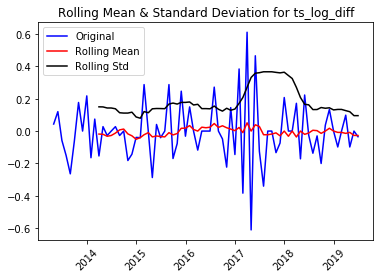

Results of Dickey-Fuller Test:
Test Statistic               -1.501622e+01
p-value                       1.038083e-27
# Lags Used                   0.000000e+00
Number of Observation Used    7.400000e+01
Critical Value (1%)          -3.521980e+00
Critical Value (5%)          -2.901470e+00
Critical Value (10%)         -2.588072e+00
dtype: float64


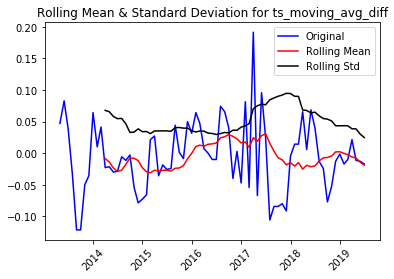

Results of Dickey-Fuller Test:
Test Statistic                -5.333439
p-value                        0.000005
# Lags Used                    3.000000
Number of Observation Used    71.000000
Critical Value (1%)           -3.526005
Critical Value (5%)           -2.903200
Critical Value (10%)          -2.588995
dtype: float64


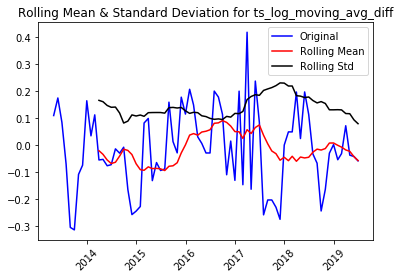

Results of Dickey-Fuller Test:
Test Statistic                -4.907494
p-value                        0.000034
# Lags Used                    3.000000
Number of Observation Used    71.000000
Critical Value (1%)           -3.526005
Critical Value (5%)           -2.903200
Critical Value (10%)          -2.588995
dtype: float64


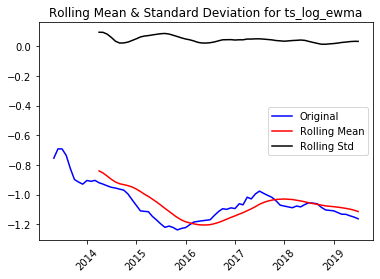

Results of Dickey-Fuller Test:
Test Statistic                -3.723581
p-value                        0.003793
# Lags Used                    2.000000
Number of Observation Used    72.000000
Critical Value (1%)           -3.524624
Critical Value (5%)           -2.902607
Critical Value (10%)          -2.588679
dtype: float64


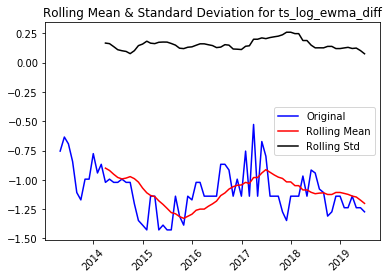

Results of Dickey-Fuller Test:
Test Statistic                -3.234401
p-value                        0.018078
# Lags Used                    1.000000
Number of Observation Used    73.000000
Critical Value (1%)           -3.523284
Critical Value (5%)           -2.902031
Critical Value (10%)          -2.588371
dtype: float64


In [0]:
# Perform stationarity test
test_stationarity(df = Nig_dts_transform, 
                  ts = 'ts_log')

# Perform stationarity test
test_stationarity(df = Nig_dts_transform, 
                  ts = 'ts_moving_avg')

# Perform stationarity test
test_stationarity(df = Nig_dts_transform, 
                  ts = 'ts_log_moving_avg')

# Perform stationarity test
test_stationarity(df = Nig_dts_transform,
                  ts = 'ts_log_diff')

# Perform stationarity test
test_stationarity(df = Nig_dts_transform,
                  ts = 'ts_moving_avg_diff')

# Perform stationarity test
test_stationarity(df = Nig_dts_transform,
                  ts = 'ts_log_moving_avg_diff')

# Perform stationarity test
test_stationarity(df = Nig_dts_transform, 
                  ts = 'ts_log_ewma')

# Perform stationarity test
test_stationarity(df = Nig_dts_transform,
                  ts = 'ts_log_ewma_diff')

Stationarity tests results

In [0]:
# Data presenting Stationarity based on DKF test

"""
ts_log_diff , p =  1.038083e-27

ts_moving_avg_diff , p = 0.000001


ts_log_moving_avg_diff , p = 0.000014


ts_log_ewma , p = 0.006116


ts_log_ewma_diff , p = 0.019188

"""

## conclusion: 'ts_log_diff' and 'ts_moving_avg_diff' will be used for the prediction
## using fbprophet 

'\nts_log_diff , p =  1.038083e-27\n\nts_moving_avg_diff , p = 0.000001\n\n\nts_log_moving_avg_diff , p = 0.000014\n\n\nts_log_ewma , p = 0.006116\n\n\nts_log_ewma_diff , p = 0.019188\n\n'

**Stationarity analysis conclusion**


The transformed variables 'ts_log_diff' and 'ts_moving_avg_diff' will be used for predictions using fbprophet

**Price volatility forecasting**

In [0]:
##### Forecasting using fbprophet

In [0]:
Nig_dts_transform.head()

,Price,ts_log,ts_log_moving_avg,ts_moving_avg,ts_log_diff,ts_moving_avg_diff,ts_log_moving_avg_diff,ts_log_ewma,ts_log_ewma_diff
dt,,,,,,,,,
2013-04-30,0.47,-0.755023,-0.864154,0.422857,0.043485,0.047143,0.109132,-0.755023,-0.755023
2013-05-31,0.53,-0.634878,-0.808901,0.447143,0.120144,0.082857,0.174023,-0.691979,-0.634878
2013-06-30,0.50,-0.693147,-0.777023,0.461429,-0.058269,0.038571,0.083876,-0.692407,-0.693147
2013-07-31,0.43,-0.843970,-0.773662,0.462857,-0.150823,-0.032857,-0.070308,-0.736097,-0.843970
2013-08-31,0.33,-1.108663,-0.804671,0.451429,-0.264693,-0.121429,-0.303992,-0.826045,-1.108663


In [19]:
# Data wrangling to match fbprophet requirements
Nig_prophet = Nig_dts_transform.drop(columns={'ts_log','ts_moving_avg',
                                           'ts_log_moving_avg',
                                          # 'ts_log_diff', 
                                          # 'ts_moving_avg_diff', 
                                           'ts_log_moving_avg_diff', 
                                           'ts_log_ewma', 
                                           'ts_log_ewma_diff'}) 
#Nig_prophet

Nig_prophet.reset_index(inplace=True)
Nig_prophet.head()



,dt,Price,ts_log_diff,ts_moving_avg_diff
0,2013-04-30,0.47,0.043485,0.047143
1,2013-05-31,0.53,0.120144,0.082857
2,2013-06-30,0.50,-0.058269,0.038571
3,2013-07-31,0.43,-0.150823,-0.032857
4,2013-08-31,0.33,-0.264693,-0.121429


In [20]:
Nig_prophet.dtypes

dt                    datetime64[ns]
Price                        float64
ts_log_diff                  float64
ts_moving_avg_diff           float64
dtype: object

In [21]:
#use 'ts_log_diff' as 'y' for prophet
Nig_fb_ts_log_diff = Nig_prophet.drop(columns={'Price', 'ts_moving_avg_diff'})
Nig_fb_ts_log_diff.rename(columns={'dt':'ds', 'ts_log_diff':'y'}, inplace=True)

Nig_fb_ts_log_diff.head()

,ds,y
0,2013-04-30,0.043485
1,2013-05-31,0.120144
2,2013-06-30,-0.058269
3,2013-07-31,-0.150823
4,2013-08-31,-0.264693


In [22]:
Nig_fb_ts_log_diff.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [0]:
#Prophet

In [0]:
import fbprophet
from fbprophet import Prophet
import datetime
from datetime import datetime

In [0]:
#dir(fbprophet) 

In [0]:
#Defining period between start and end dates
def days_between(d1, d2):
  """
  d1 and d2 inclusive
  """
  d1 = datetime.strptime(d1, "%Y-%m-%d")
  d2 = datetime.strptime(d2, "%Y-%m-%d")
  return abs((d2 - d1).days + 1)

date_column = 'ds'
metric_column = 'y'
table = Nig_fb_ts_log_diff
start_training_date = '2013-04-30'
end_traning_date = '2019-06-30'
start_forecasting_date = '2019-07-30'
end_forecasting_date = '2019-12-31'
year_to_estimate = '2019'

# Forecasting period
future_num_points = days_between(start_forecasting_date, end_forecasting_date)


In [0]:
#Fitting model to data

In [0]:
#dir(Prophet)

In [0]:
model = Prophet(weekly_seasonality=True, daily_seasonality=True,
                #    mcmc_samples=1, 
                #    uncertainty_samples=1000, 
                )

In [28]:
model.fit(Nig_fb_ts_log_diff)

In [0]:
#create dateframe for prediction
future_df = model.make_future_dataframe(periods=future_num_points)

In [30]:
#forecast
forecast = model.predict(future_df)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-04-30,-0.002032,-0.333557,0.055652,-0.002032,-0.002032,-0.124831,-0.124831,-0.124831,-0.029687,-0.029687,-0.029687,0.013885,0.013885,0.013885,-0.109029,-0.109029,-0.109029,0.0,0.0,0.0,-0.126863
1,2013-05-31,-0.002156,-0.073230,0.326908,-0.002156,-0.002156,0.134167,0.134167,0.134167,-0.029687,-0.029687,-0.029687,0.003387,0.003387,0.003387,0.160467,0.160467,0.160467,0.0,0.0,0.0,0.132011
2,2013-06-30,-0.002276,-0.251656,0.147755,-0.002276,-0.002276,-0.053566,-0.053566,-0.053566,-0.029687,-0.029687,-0.029687,-0.029573,-0.029573,-0.029573,0.005694,0.005694,0.005694,0.0,0.0,0.0,-0.055842
3,2013-07-31,-0.002399,-0.146189,0.234403,-0.002399,-0.002399,0.047941,0.047941,0.047941,-0.029687,-0.029687,-0.029687,0.078880,0.078880,0.078880,-0.001252,-0.001252,-0.001252,0.0,0.0,0.0,0.045541
4,2013-08-31,-0.002523,-0.292591,0.116833,-0.002523,-0.002523,-0.079235,-0.079235,-0.079235,-0.029687,-0.029687,-0.029687,-0.021697,-0.021697,-0.021697,-0.027851,-0.027851,-0.027851,0.0,0.0,0.0,-0.081758


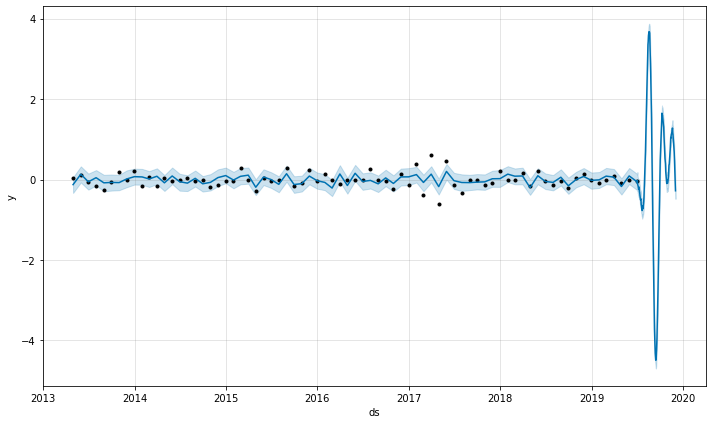

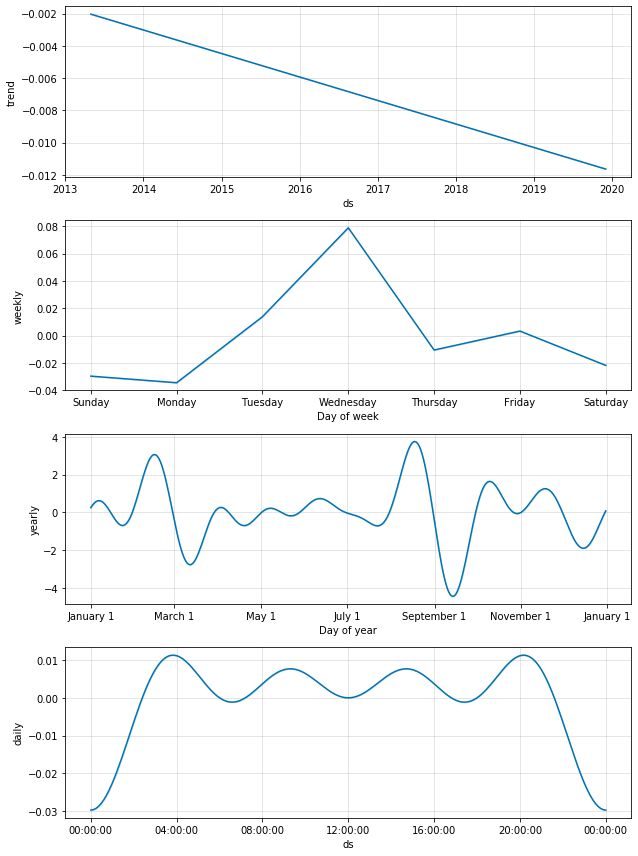

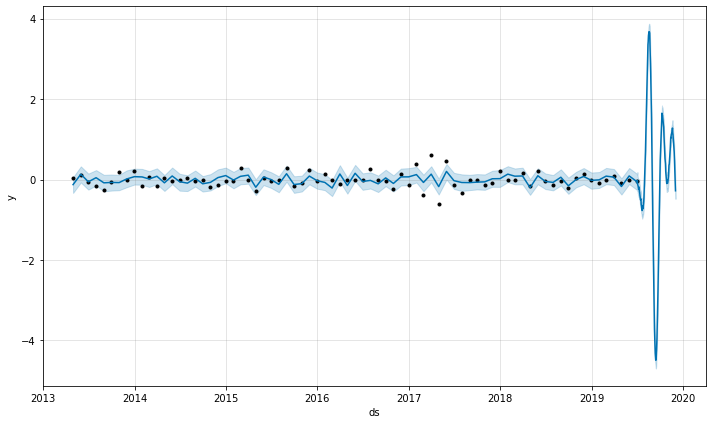

In [31]:
#Plotting
model.plot_components(forecast)
model.plot(forecast)

In [32]:
#use 'ts_moving_avg_diff' as 'y' for prophet
Nig_fb_ts_moving_avg_diff = Nig_prophet.drop(columns={'Price', 'ts_log_diff'})
Nig_fb_ts_moving_avg_diff.rename(columns={'dt':'ds', 'ts_moving_avg_diff':'y'}, inplace=True)

Nig_fb_ts_moving_avg_diff.head()

,ds,y
0,2013-04-30,0.047143
1,2013-05-31,0.082857
2,2013-06-30,0.038571
3,2013-07-31,-0.032857
4,2013-08-31,-0.121429


In [0]:
model_ff = Prophet(weekly_seasonality=True, daily_seasonality=True, 
              #    mcmc_samples=1, 
              #    uncertainty_samples=1000, 
                   )

In [34]:
model_ff.fit(Nig_fb_ts_moving_avg_diff)

In [0]:
future_dff = model_ff.make_future_dataframe(periods=future_num_points)

In [36]:
forecast_ff = model_ff.predict(future_dff)
forecast_ff.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-04-30,-0.000578,-0.063034,0.049029,-0.000578,-0.000578,-0.005862,-0.005862,-0.005862,-0.008273,-0.008273,-0.008273,0.004703,0.004703,0.004703,-0.002291,-0.002291,-0.002291,0.0,0.0,0.0,-0.006440
1,2013-05-31,-0.000613,-0.006531,0.105487,-0.000613,-0.000613,0.049652,0.049652,0.049652,-0.008273,-0.008273,-0.008273,0.027697,0.027697,0.027697,0.030229,0.030229,0.030229,0.0,0.0,0.0,0.049039
2,2013-06-30,-0.000647,-0.059906,0.057254,-0.000647,-0.000647,0.001482,0.001482,0.001482,-0.008273,-0.008273,-0.008273,-0.005600,-0.005600,-0.005600,0.015356,0.015356,0.015356,0.0,0.0,0.0,0.000835
3,2013-07-31,-0.000682,-0.056866,0.058604,-0.000682,-0.000682,0.004558,0.004558,0.004558,-0.008273,-0.008273,-0.008273,0.016762,0.016762,0.016762,-0.003931,-0.003931,-0.003931,0.0,0.0,0.0,0.003875
4,2013-08-31,-0.000718,-0.100918,0.010159,-0.000718,-0.000718,-0.044731,-0.044731,-0.044731,-0.008273,-0.008273,-0.008273,-0.018330,-0.018330,-0.018330,-0.018127,-0.018127,-0.018127,0.0,0.0,0.0,-0.045448


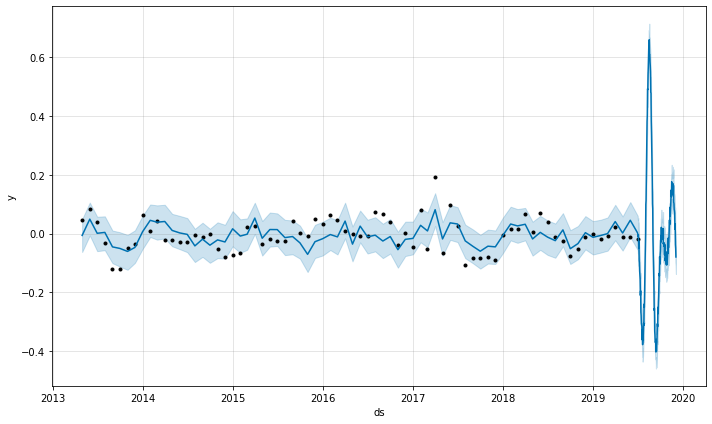

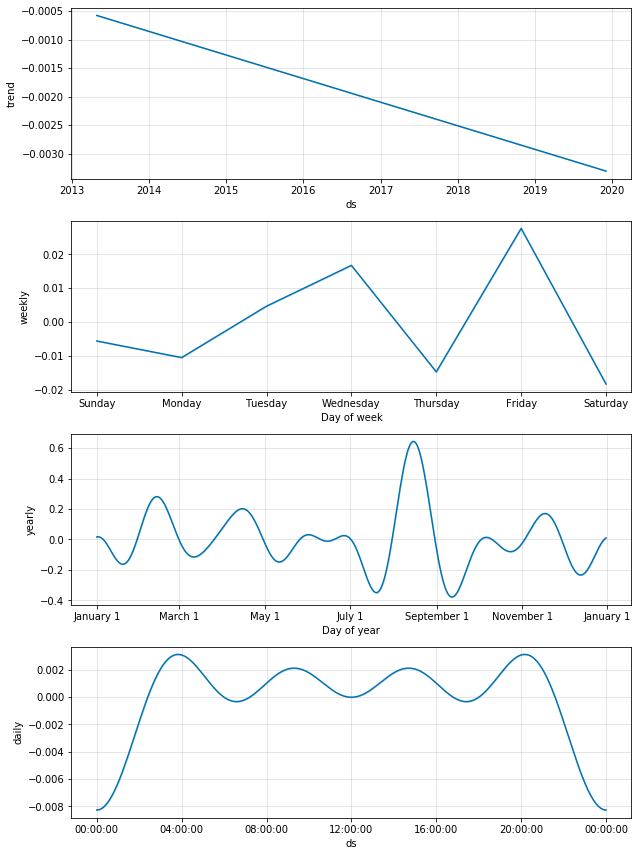

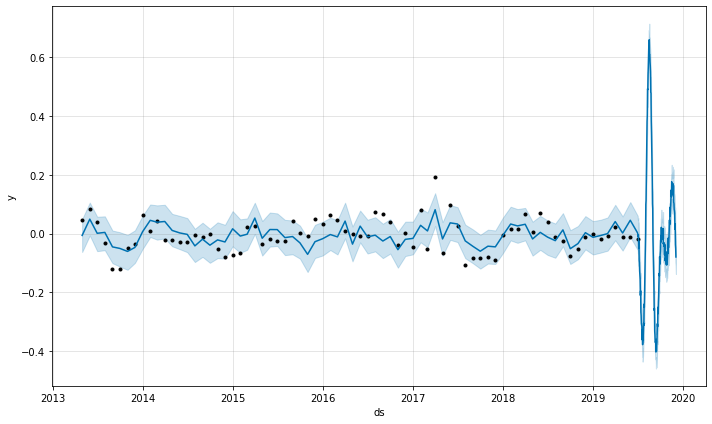

In [37]:
#Plotting
model_ff.plot_components(forecast_ff)
model_ff.plot(forecast_ff)


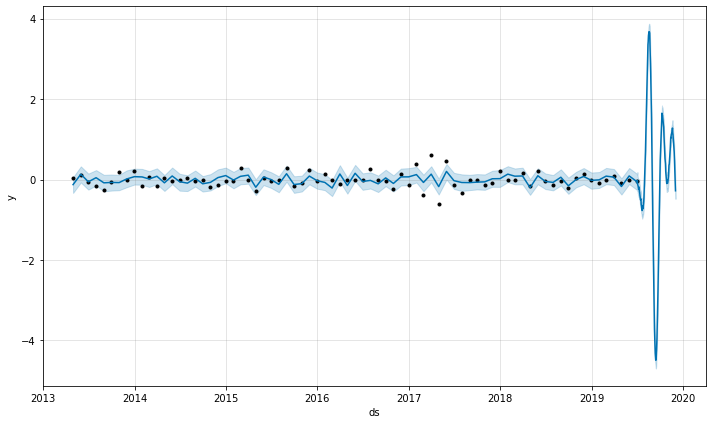

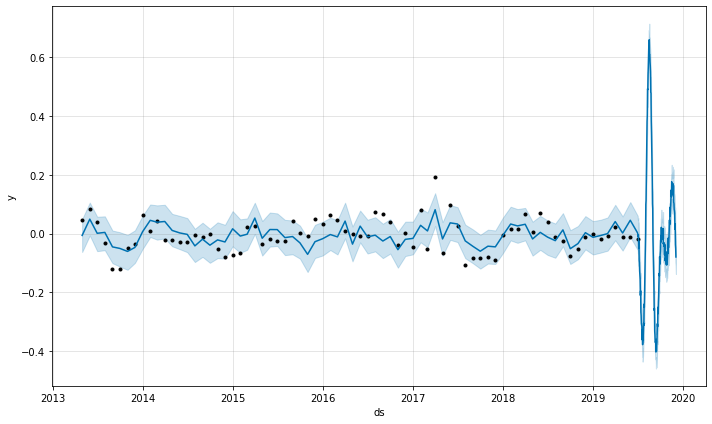

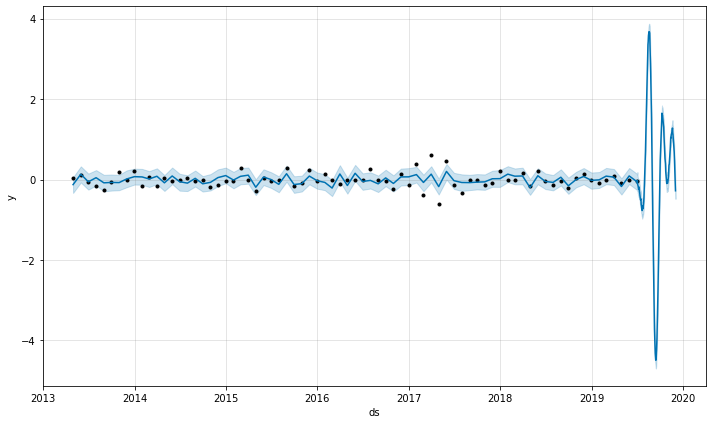

In [38]:

model_ff.plot(forecast_ff)
model.plot(forecast)


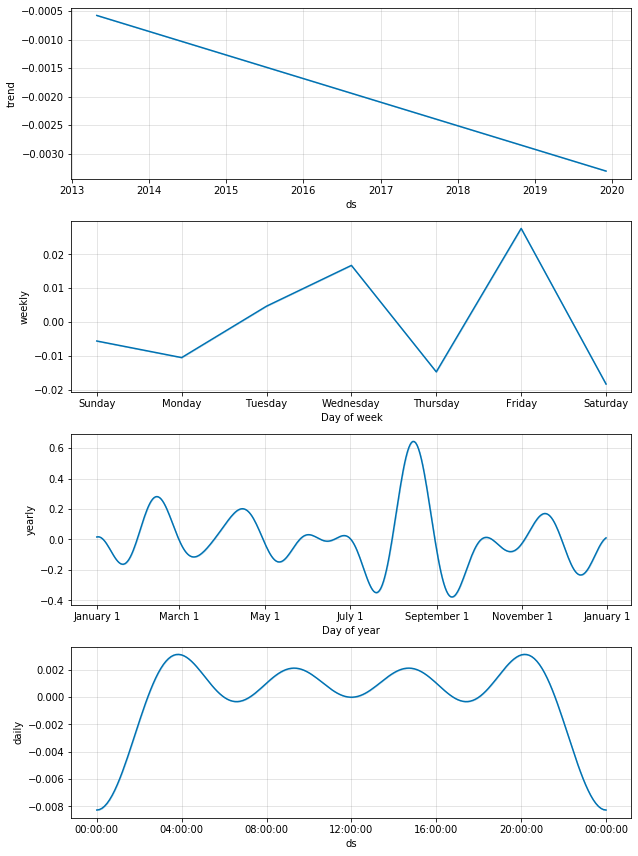

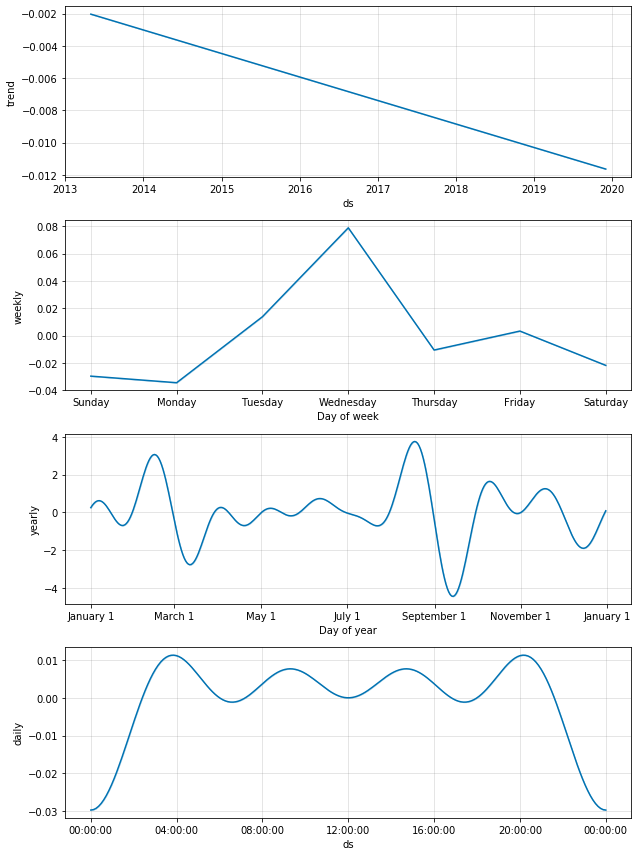

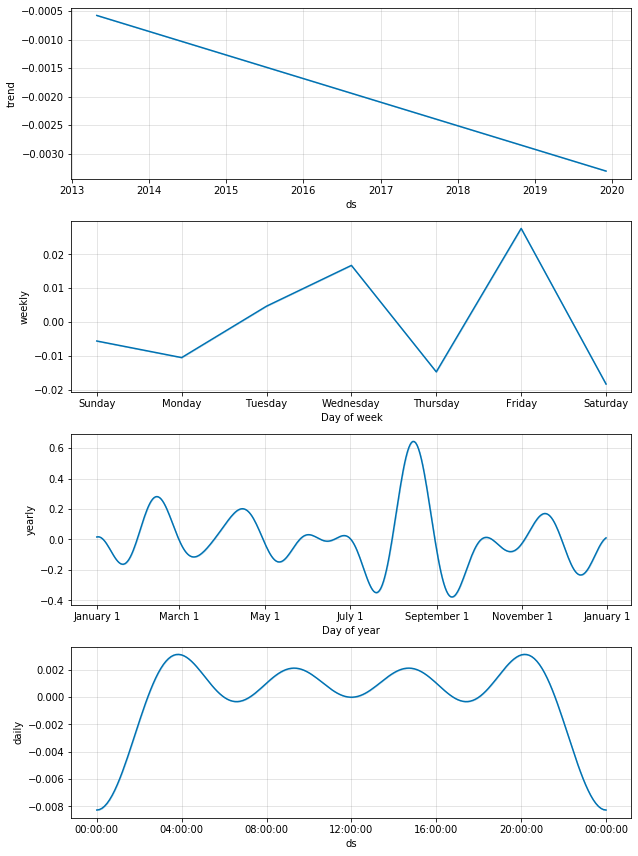

In [0]:
model.plot_components(forecast)
model_ff.plot_components(forecast_ff) 

**Model cross-validation**

Note: models presented are not optimized

In [0]:
#cross validation

In [0]:
def calculate_mape(y_true, y_pred):
    """ Calculate mean absolute percentage error (MAPE)"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_mpe(y_true, y_pred):
    """ Calculate mean percentage error (MPE)"""
    return np.mean((y_true - y_pred) / y_true) * 100

def calculate_mae(y_true, y_pred):
    """ Calculate mean absolute error (MAE)"""
    return np.mean(np.abs(y_true - y_pred)) * 100

def calculate_rmse(y_true, y_pred):
    """ Calculate root mean square error (RMSE)"""
    return np.sqrt(np.mean((y_true - y_pred)**2))

def print_error_metrics(y_true, y_pred):
    print('MAPE: %f'%calculate_mape(y_true, y_pred))
    print('MPE: %f'%calculate_mpe(y_true, y_pred))
    print('MAE: %f'%calculate_mae(y_true, y_pred))
    print('RMSE: %f'%calculate_rmse(y_true, y_pred))
    return

In [40]:
print_error_metrics(y_true = Nig_fb_ts_log_diff['y'], y_pred = forecast['yhat'])

MAPE: inf
MPE: nan
MAE: 12.350736
RMSE: 0.156145


In [41]:
print_error_metrics(y_true = Nig_fb_ts_moving_avg_diff['y'], y_pred = forecast_ff['yhat'])

MAPE: 216250912221436.500000
MPE: 216250912221303.062500
MAE: 3.823878
RMSE: 0.044973


End of price volatility prediction using statistics and ML (fbprophet)